In [76]:
import osmnx as ox, matplotlib.pyplot as plt, pandas as pd, geopandas as gpd
import requests
import fiona
import numpy as np
import json
from pandas.io.json import json_normalize
import urllib.request, json 

from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon, shape
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [47]:
#Get polygon of NYC
gdf = ox.gdf_from_place('New York City, NY, USA')

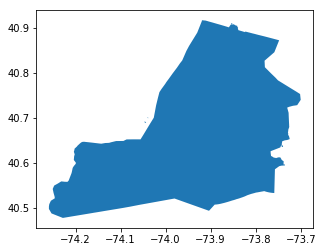

In [48]:
gdf.plot()

In [49]:
# define a bounding box in NYC
south, west, north, east = gdf.unary_union.buffer(0.1).bounds

In [37]:
print(south, west, north, east)

-74.35908999097687 40.37753432750217 -73.60019572851844 41.01617676767561


https://stackoverflow.com/questions/36516183/what-should-i-use-instead-of-urlopen-in-urllib3
https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
https://stackoverflow.com/questions/7771011/parse-json-in-python
https://gis.stackexchange.com/questions/225586/reading-raw-data-into-geopandas
https://stackoverflow.com/questions/33559660/error-while-reading-json-file

In [116]:
data = urllib.request.urlopen("http://overpass-api.de/api/interpreter?data=[out:json];node[highway=traffic_signals](40.37753432750217,-74.35908999097687,41.01617676767561,-73.60019572851844);out%20meta;").read()
output = json.loads(data)
list(output.keys())

['version', 'generator', 'osm3s', 'elements']

In [117]:
# converting json dataset from dictionary to dataframeprint(data.head())
data = pd.DataFrame.from_dict(output, orient='index')
print(data.head())

                                                           0
version                                                  0.6
generator                     Overpass API 0.7.55.4 3079d8ea
osm3s      {'timestamp_osm_base': '2018-10-29T21:32:02Z',...
elements   [{'type': 'node', 'id': 42421728, 'lat': 40.79...


In [121]:
data.reset_index(level=0, inplace=True)
print(data.head())


       index                                                  0
0    version                                                0.6
1  generator                     Overpass API 0.7.55.4 3079d8ea
2      osm3s  {'timestamp_osm_base': '2018-10-29T21:32:02Z',...
3   elements  [{'type': 'node', 'id': 42421728, 'lat': 40.79...


I want to create a geopandas dataframe with elements.
type, id, lat, long,tags
